In [2]:
#Not Necessary for DLC Analysis
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
# R package names
packnames = ('ggplot2', 'hexbin', 'sp', 'imputeTS', 'ggmap', 'data.table', 'cowplot', 'corrplot', 'tensorflow', 'keras')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [4]:
#Necessary for DLC Analysis
%load_ext rpy2.ipython

import rpy2.robjects.packages as rpackages

utils = rpackages.importr('utils')

utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('sp', 'imputeTS', 'ggplot2', 'ggmap', 'data.table', 'cowplot', 'corrplot')

from rpy2.robjects.vectors import StrVector

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0: utils.install_packages(StrVector(names_to_install))

c:\Users\eseos\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


[1] "interpolating points with likelihood < 0.95"


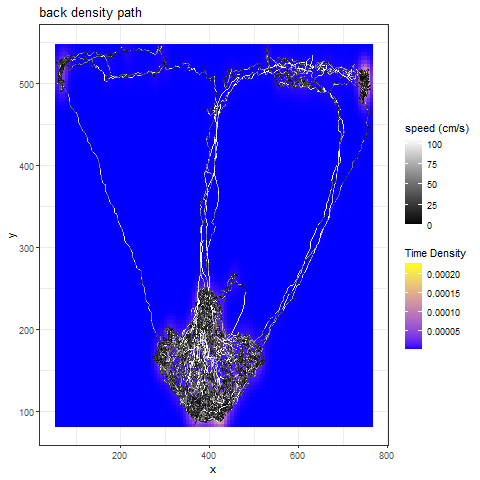

In [13]:
%%R
#DLC Analysis

library(sp) #tested with v1.3-2
library(imputeTS) #tested with v3.0
library(ggplot2) #tested with v3.1.0
library(ggmap) #tested with v3.0.0
library(data.table) #tested with v1.12.8
library(cowplot) #tested with v0.9.4
library(corrplot) #tested with v0.84

#setting the working directory
setwd("C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/DLC Analysis Testing/EU010/Day 9")
source("C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/Notebooks/DLCAnalyzer_Functions_final.R")

#setting the DLC file to track from
Tracking <- ReadDLCDataFromCSV(file = "eu010_day9leftonly_2022-12-12_11.42DLC_resnet50_Big ExperimentDec20shuffle1_250000.csv", fps = 25)

#names of limbs that were plotted
names(Tracking$data)

#checking the first few frames of labeling for the back
head(Tracking$data$back)

#Plotting the positions of various limbs throughout the session
PlotPointData(Tracking, points = c("nose","back","butt","tailtip"))

#Removing outliers based on likelihood and plotting again
Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
PlotPointData(Tracking, points = c("nose","back","butt","tailtip"))

#Tracking speed and checking first few frames of speed values for the back
Tracking <- CalculateMovement(Tracking, movement_cutoff = 5, integration_period = 5)
head(Tracking$data$back)

#Converting to metric
Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 7.0, points = c("midhead","butt"))
Tracking$px.to.cm
PlotPointData(Tracking, points = c("nose","back","butt","tailtip"))

#Plotting density for each limb
plots <- PlotDensityPaths(Tracking,points = c("nose","back","butt","tailtip"))
plots$back
